---
title: "Moment Matching"
subtitle: "Business Cycles and Fluctuations - AE2E6"
format:
    ipynb:
        output_file: problem.ipynb
    html:
        output-file: problem.html
---

::: {.callout-note collapse="true" title="Objectives"}


- Learn the Dyno mini-interface
    - check the steady-state
    - understand the meaning of shocks (exogenous variables, innovations)
    - understand the outputs (decision rule, simulation, graphs)
    - interpret IRFs (persistence, magnitude, ...)

::: 

# Using Dyno



__Open the RBC model. Fix the mistakes in the modfile if any.__ 

__Inspect the various elements of the solution (decision rule, unconditional moments, simulations).__

__Interpret the effect of a productivity shock. How does it depend on the productivity?__

# Computing moments in the data

__Download US time series from the world bank for: real gdp, investment, consumption, hours worked.__

In [5]:
# uncomment the next lines, the first time you run
# import Pkg; Pkg.add("WorldBankData")
# import Pkg; Pkg.add(url="https://github.com/sdBrinkmann/HPFilter.jl") # we install hpfilter from github

In [6]:
import Pkg; Pkg.add("DBnomics")
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ? HPFilter
  ✓ TimeZones → TimeZonesRecipesBaseExt
  ✓ Latexify → DataFramesExt
  ✓ Plots
  ✓ Plots → UnitfulExt
  4 dependencies successfully precompiled in 36 seconds. 198 already precompiled.
  1 dependency failed but may be precompilable after restarting julia
  1 dependency had output during precompilation:
┌ HPFilter
│  WARNING: Method definition HP(Array{T, 1} where T, Int64) in module HPFilter at /home/pablo/.julia/packages/HPFilter/981TT/src/HPFilterFunc.jl:8 overwritten at /home/pablo/.julia/packages/HPFilter/981TT/src/HPFilterFunc.jl:26.
│  ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
└  


In [7]:
using DBnomics

In [8]:
# google OECD
df_ = rdb(ids = [
    "OECD/QNA/USA.P5.LNBQRSA.Q", # investment
    "OECD/QNA/USA.B1_GS1.LNBQRSA.Q", # GDP
    "OECD/QNA/USA.P3.LNBQRSA.Q"

]);

In [9]:
df_long = df_[!,["Subject","period","value"]]

,Subject,period,value
,String,Date…,Float64
1,Gross capital formation,1970-01-01,2.15688e5
2,Gross capital formation,1970-04-01,2.14743e5
3,Gross capital formation,1970-07-01,217739.0
4,Gross capital formation,1970-10-01,2.08844e5
5,Gross capital formation,1971-01-01,2.23069e5
6,Gross capital formation,1971-04-01,2.27366e5
7,Gross capital formation,1971-07-01,2.29696e5
8,Gross capital formation,1971-10-01,2.23591e5
9,Gross capital formation,1972-01-01,2.34297e5


In [10]:
# import Pkg; Pkg.add("DataFrames")
using DataFrames

In [11]:
df = unstack(df_long,:period, :Subject,:value)

,period,Gross capital formation,Gross domestic product,Final consumption expenditure
,Date…,Float64?,Float64?,Float64?
1,1970-01-01,2.15688e5,1.32516e6,1.13697e6
2,1970-04-01,2.14743e5,1.32704e6,1.13882e6
3,1970-07-01,217739.0,1.33927e6,1.14738e6
4,1970-10-01,2.08844e5,1.32492e6,1.14562e6
5,1971-01-01,2.23069e5,1.3609e6,1.1627e6
6,1971-04-01,2.27366e5,1.36826e6,1.17093e6
7,1971-07-01,2.29696e5,1.37952e6,1.17765e6
8,1971-10-01,2.23591e5,1.38276e6,1.19219e6
9,1972-01-01,2.34297e5,1.40816e6,1.2072e6


In [12]:
df = dropmissing(sort(df))

,period,Gross capital formation,Gross domestic product,Final consumption expenditure
,Date…,Float64,Float64,Float64
1,1970-01-01,2.15688e5,1.32516e6,1.13697e6
2,1970-04-01,2.14743e5,1.32704e6,1.13882e6
3,1970-07-01,217739.0,1.33927e6,1.14738e6
4,1970-10-01,2.08844e5,1.32492e6,1.14562e6
5,1971-01-01,2.23069e5,1.3609e6,1.1627e6
6,1971-04-01,2.27366e5,1.36826e6,1.17093e6
7,1971-07-01,2.29696e5,1.37952e6,1.17765e6
8,1971-10-01,2.23591e5,1.38276e6,1.19219e6
9,1972-01-01,2.34297e5,1.40816e6,1.2072e6


In [13]:
using Plots

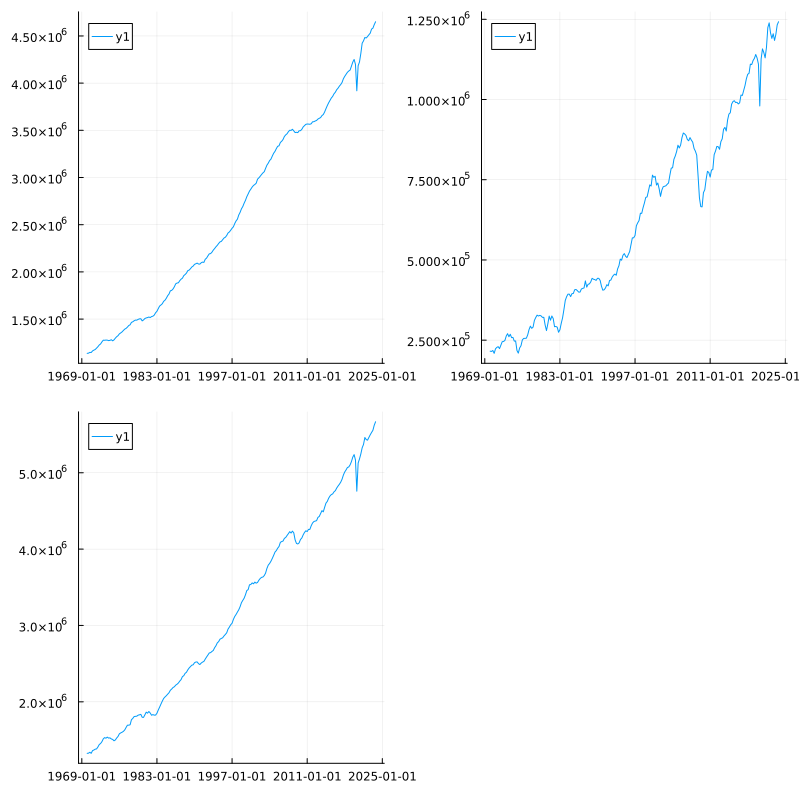

In [14]:
pl1 = plot(df[!,:period], df[!,"Final consumption expenditure"])
pl2 = plot(df[!,:period], df[!,"Gross capital formation"])
pl3 = plot(df[!,:period], df[!,"Gross domestic product"])

plot(pl1,pl2,pl3;size=(800,800))


In [15]:
series = df[!,"Final consumption expenditure"]
trend = HP(series, 1600)
cycle_c = (series - trend)./trend

UndefVarError: UndefVarError: `HP` not defined

In [16]:
series = df[!,"Gross capital formation"]
trend = HP(series, 1600)
cycle_inv = (series - trend)./trend

UndefVarError: UndefVarError: `HP` not defined

In [17]:
series = df[!,"Gross domestic product"]
trend = HP(series, 1600)
cycle_gdp = (series - trend)./trend

UndefVarError: UndefVarError: `HP` not defined

In [18]:
plot(plot(cycle_gdp), plot(cycle_inv), plot(cycle_c))

UndefVarError: UndefVarError: `cycle_gdp` not defined

In [19]:
using Statistics

In [20]:
cor(Matrix(df[!,2:4]))

3×3 Matrix{Float64}:
 1.0       0.990787  0.987691
 0.990787  1.0       0.99941
 0.987691  0.99941   1.0

In [21]:
std(Matrix(df[!,2]))

MethodError: MethodError: no method matching (Matrix)(::Vector{Float64})

Closest candidates are:
  (Array{T, N} where T)(::AbstractArray{S, N}) where {S, N}
   @ Core boot.jl:498
  (Matrix)(!Matched::UndefInitializer, !Matched::Integer, !Matched::Integer)
   @ Base baseext.jl:33
  (Matrix)(!Matched::LinearAlgebra.QRPivoted)
   @ LinearAlgebra ~/.julia/juliaup/julia-1.10.2+0.x64.linux.gnu/share/julia/stdlib/v1.10/LinearAlgebra/src/qr.jl:448
  ...


In [22]:
9.18606e10 / 1.64085e12

0.05598354511381296

# Using Dyno



__Open the RBC model. Fix the mistakes in the modfile if any. Inspect the various elements of the solution.__

__Interpret the effect of a productivity shock.__